# <font style="color:rgb(50,120,229)">Bitwise Operations </font>

So far we have had a look at some basic arithmetic operations. Now it's time to study the last set of operations in this module - bitwise operations. We will focus on the following bitwise operations.

**AND operation**: [**`cv2.bitwise_and`**](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)

**OR operation**: [**`cv2.bitwise_or`**](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#gab85523db362a4e26ff0c703793a719b4)

**NOT operation**: [**`cv2.bitwise_not`**](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f)

**XOR operation**: [**`cv2.bitwise_xor`**](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#ga84b2d8188ce506593dcc3f8cd00e8e2c)


Among all the bitwise operations, the AND operation is the most used.

### <font style = "color:rgb(8,133,37)">Function Syntax</font>
```python
dst	=	cv2.bitwise_XXX(	src1, src2[, dst[, mask]]	)
```

XXX stands for the operation

**Parameters**

- **`src1`**	- first input.
- **`src2`**	- second input.
- **`dst`**	- output array that has the same size and type as the input array.
- **`mask`** - optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed. The operation is applied only on those pixels of the input images where the mask is non-zero.

**The operation is applied elementwise between two matrices. The two inputs should be of the same size for this operation.**

Here's a cheat sheet on the input and output table for these bitwise operations.

| **Operation** | **Input-1** | **Input-2** | **Output** |
| --- | --- | --- | --- |
| **AND** | 0 | 0 | 0 |
| **AND** | 0 | 1 | 0 |
| **AND** | 1 | 0 | 0 |
| **AND** | 1 | 1 | 1 |
| **OR** | 0 | 0 | 0 |
| **OR** | 0 | 1 | 1 |
| **OR** | 1 | 0 | 1 |
| **OR** | 1 | 1 | 1 |
| **NOT** | 0 | NA | 1 |
| **NOT** | 1 | NA | 0 |
| **XOR** | 0 | 0 | 0 |
| **XOR** | 0 | 1 | 1 |
| **XOR** | 1 | 0 | 1 |
| **XOR** | 1 | 1 | 0 |

They will be highly useful while extracting any part of the image (as we will see in coming modules), defining and working with non-rectangular ROI etc.

## <font style="color:rgb(50,120,229)">Example</font>

To understand the usage of these functions, let us take the sunglass filter example from the previous section and use bitwise operations to arrive at the same result.

We will follow the same steps, but instead of arithmetic operations like MULTIPLY & ADD  , we will use bitwise operations like AND, NOT and OR.

In [1]:
# Import libraries
import cv2
import numpy as np
from dataPath import DATA_PATH
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

### <font style="color:rgb(8,133,37)">Load the images </font>

image Dimension =(100, 300, 4)


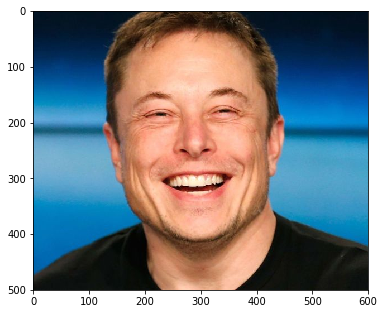

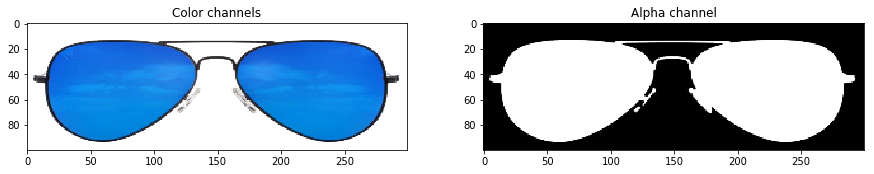

In [3]:
# Load the Face Image
faceImagePath = os.path.join(DATA_PATH,"images/musk.jpg")
faceImage = cv2.imread(faceImagePath)
plt.imshow(faceImage[...,::-1])
# Make a copy
faceWithGlassesBitwise = faceImage.copy()

# Load the Sunglass image with Alpha channel
glassimagePath = os.path.join(DATA_PATH,"images/sunglass.png")
glassPNG = cv2.imread(glassimagePath,-1)

# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(300,100))
print("image Dimension ={}".format(glassPNG.shape))

# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Alpha channel');

### <font style="color:rgb(8,133,37)">Get the masked outputs </font>

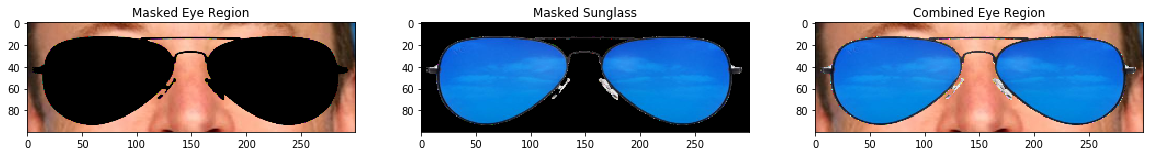

In [4]:
# Get the eye region from the face image
eyeROI= faceWithGlassesBitwise[150:250,140:440]

# Make the dimensions of the mask same as the input image.
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))

# Use the mask to create the masked eye region
eye = cv2.bitwise_and(eyeROI,cv2.bitwise_not(glassMask))

# Use the mask to create the masked sunglass region
sunglass = cv2.bitwise_and(glassBGR,glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.bitwise_or(eye, sunglass)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(eye[:,:,::-1]);plt.title("Masked Eye Region");
plt.subplot(132);plt.imshow(sunglass[:,:,::-1]);plt.title("Masked Sunglass");
plt.subplot(133);plt.imshow(np.uint8(eyeRoiFinal)[:,:,::-1]);plt.title("Combined Eye Region");

### <font style="color:rgb(8,133,37)">Get the final Result</font>

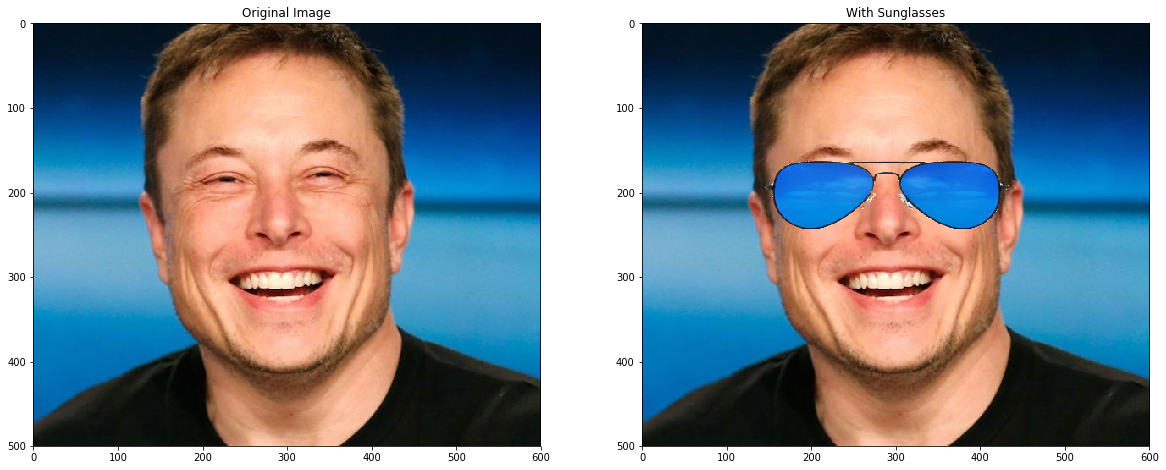

In [5]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesBitwise[150:250,140:440]=eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesBitwise[:,:,::-1]);plt.title("With Sunglasses");